In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("census_income.csv")
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

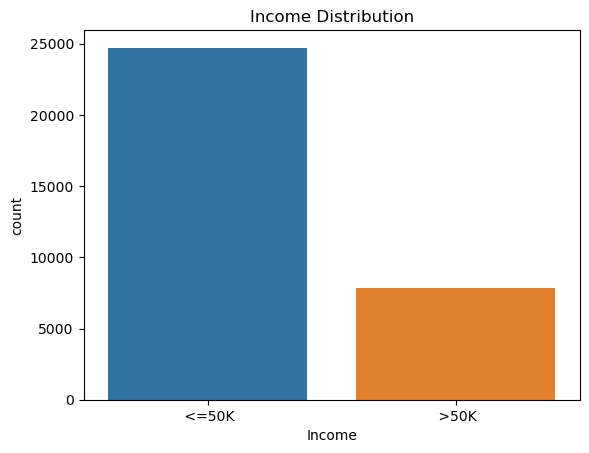

In [5]:
sns.countplot(x='Income', data=data)
plt.title('Income Distribution')
plt.show()

In [7]:
# Education or Education_num column they represent the same information.
# Drop the 'Education' column
data = data.drop(columns=['Education'])

In [8]:
# One-hot encode categorical columns
categorical_columns = ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# Label encode the 'Income' column using LabelEncoder
label_encoder = LabelEncoder()
data['Income'] = label_encoder.fit_transform(data['Income'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 86 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Age                                         32560 non-null  int64
 1   Fnlwgt                                      32560 non-null  int64
 2   Education_num                               32560 non-null  int64
 3   Capital_gain                                32560 non-null  int64
 4   Capital_loss                                32560 non-null  int64
 5   Hours_per_week                              32560 non-null  int64
 6   Income                                      32560 non-null  int32
 7   Workclass_ Federal-gov                      32560 non-null  bool 
 8   Workclass_ Local-gov                        32560 non-null  bool 
 9   Workclass_ Never-worked                     32560 non-null  bool 
 10  Workclass_ Private                

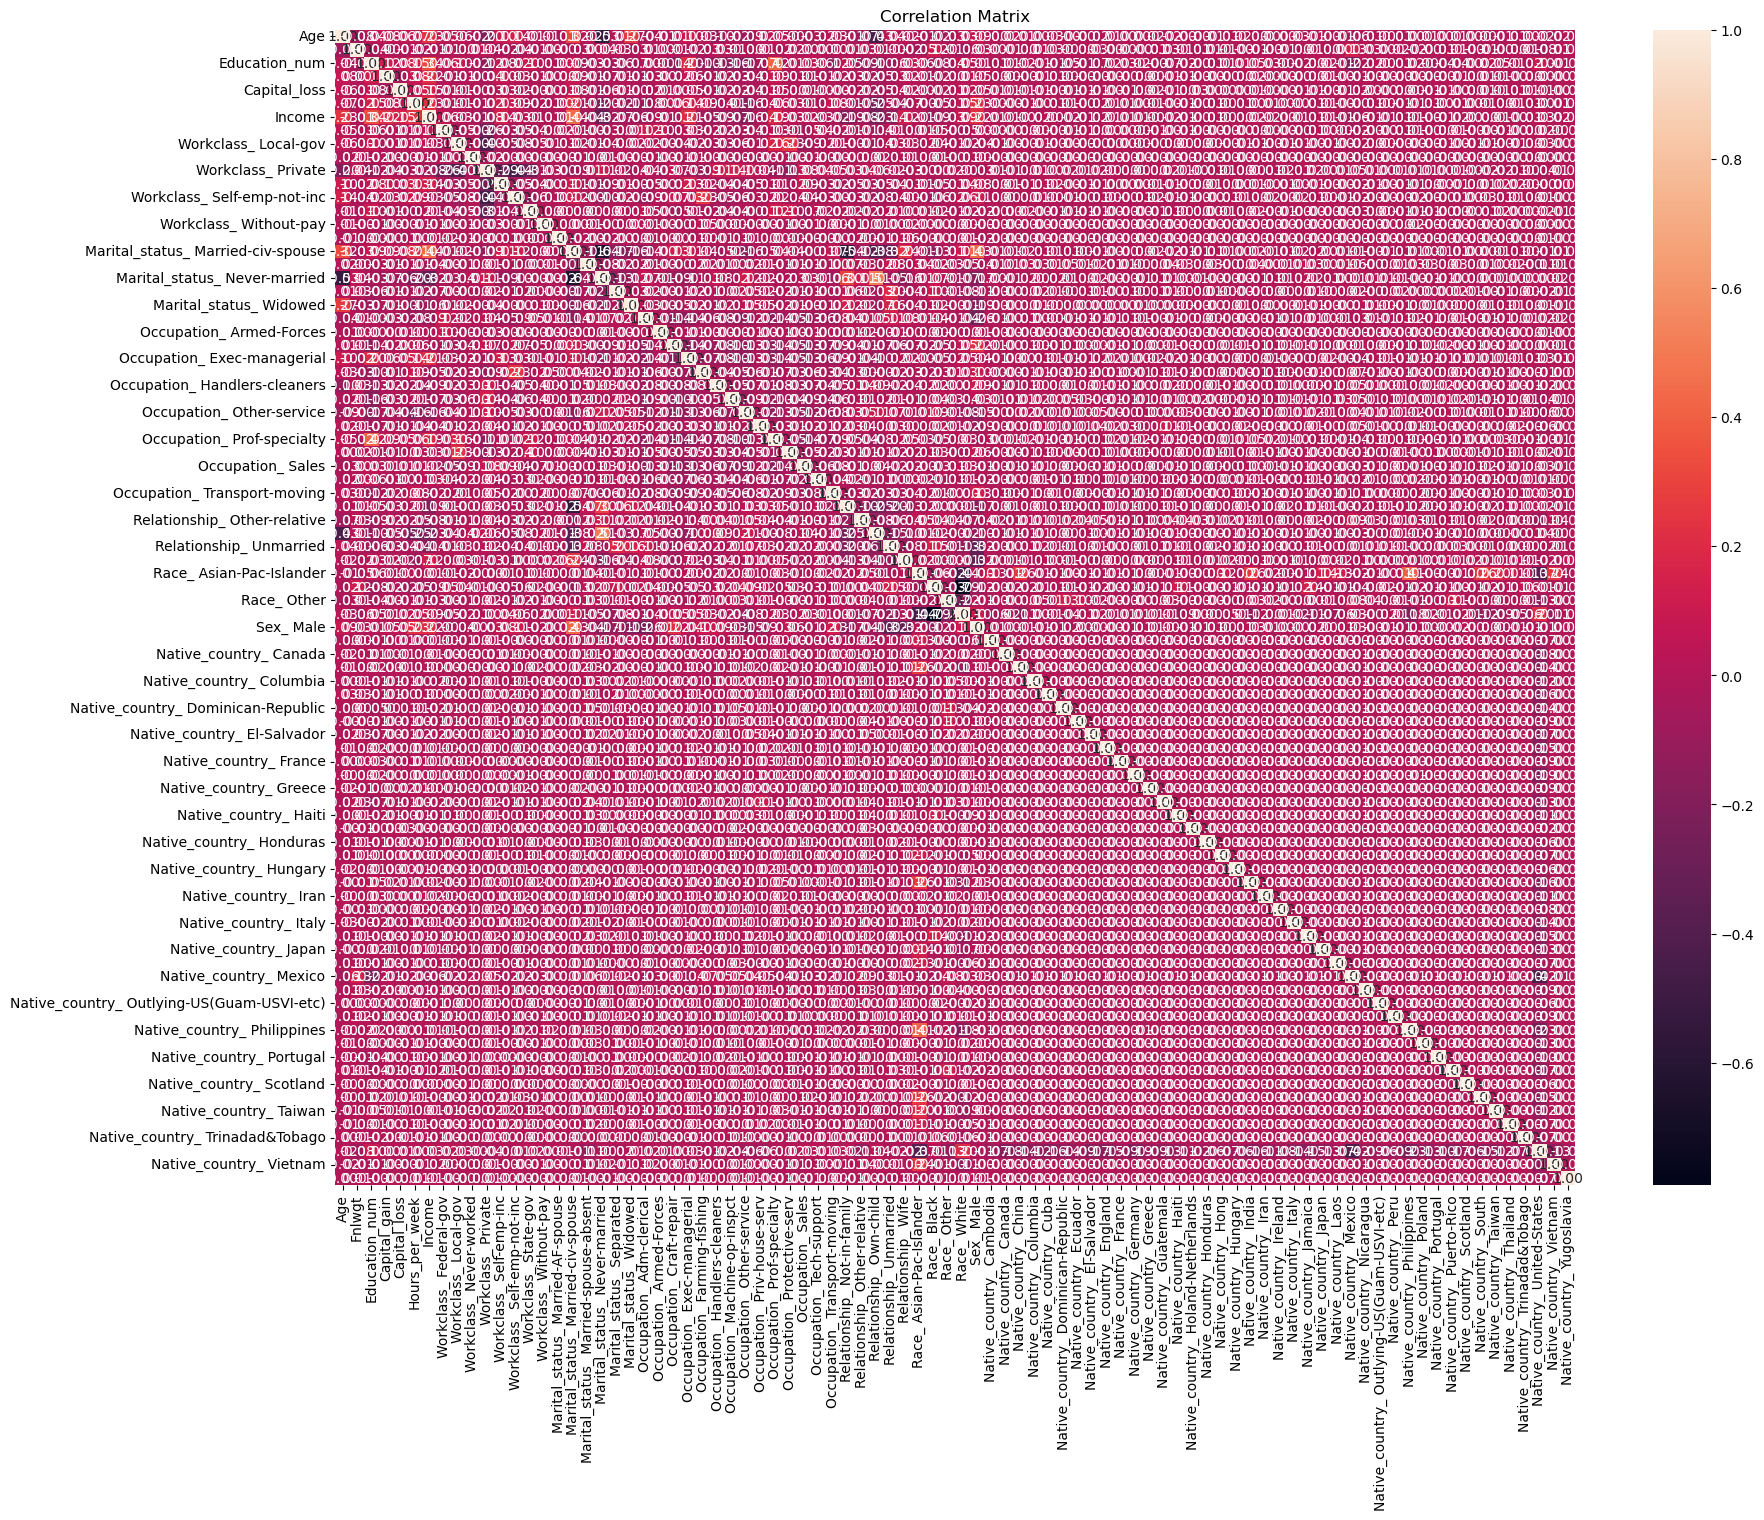

In [15]:
# Correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [30]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# correlations with 'Income'
income_corr = correlation_matrix["Income"].sort_values(ascending=False)

# Display the top 5 features most positively and negatively correlated with 'Income'
positive_income_corr = correlation_matrix["Income"][correlation_matrix["Income"] > 0]

# list of columns with positive correlation
positive_features = positive_income_corr.index.tolist()

# DataFrame with only these positively correlated features
data_positive_corr = data[positive_features]

In [31]:
data_positive_corr.head()

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,...,Native_country_ Hong,Native_country_ India,Native_country_ Iran,Native_country_ Italy,Native_country_ Japan,Native_country_ Philippines,Native_country_ Scotland,Native_country_ Taiwan,Native_country_ United-States,Native_country_ Yugoslavia
0,50,13,0,0,13,0,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,38,9,0,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,53,7,0,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,28,13,0,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,37,14,0,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [32]:
data_positive_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 32560 non-null  int64
 1   Education_num                       32560 non-null  int64
 2   Capital_gain                        32560 non-null  int64
 3   Capital_loss                        32560 non-null  int64
 4   Hours_per_week                      32560 non-null  int64
 5   Income                              32560 non-null  int32
 6   Workclass_ Federal-gov              32560 non-null  bool 
 7   Workclass_ Local-gov                32560 non-null  bool 
 8   Workclass_ Self-emp-inc             32560 non-null  bool 
 9   Workclass_ Self-emp-not-inc         32560 non-null  bool 
 10  Workclass_ State-gov                32560 non-null  bool 
 11  Marital_status_ Married-AF-spouse   32560 non-null  bool 
 12  Mari

In [53]:
data_positive_corr.describe()

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


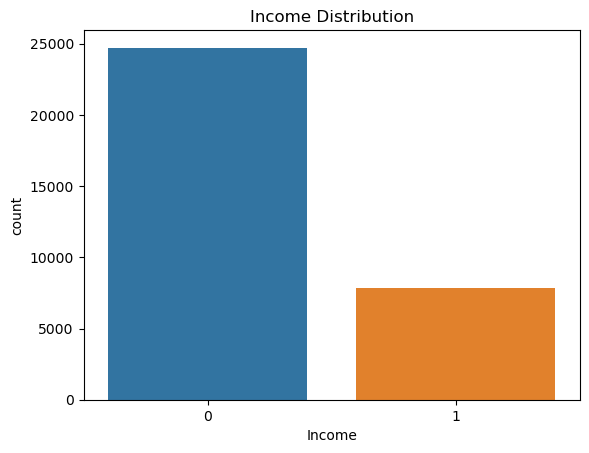

In [25]:
sns.countplot(x='Income', data=data)
plt.title('Income Distribution')
plt.show()

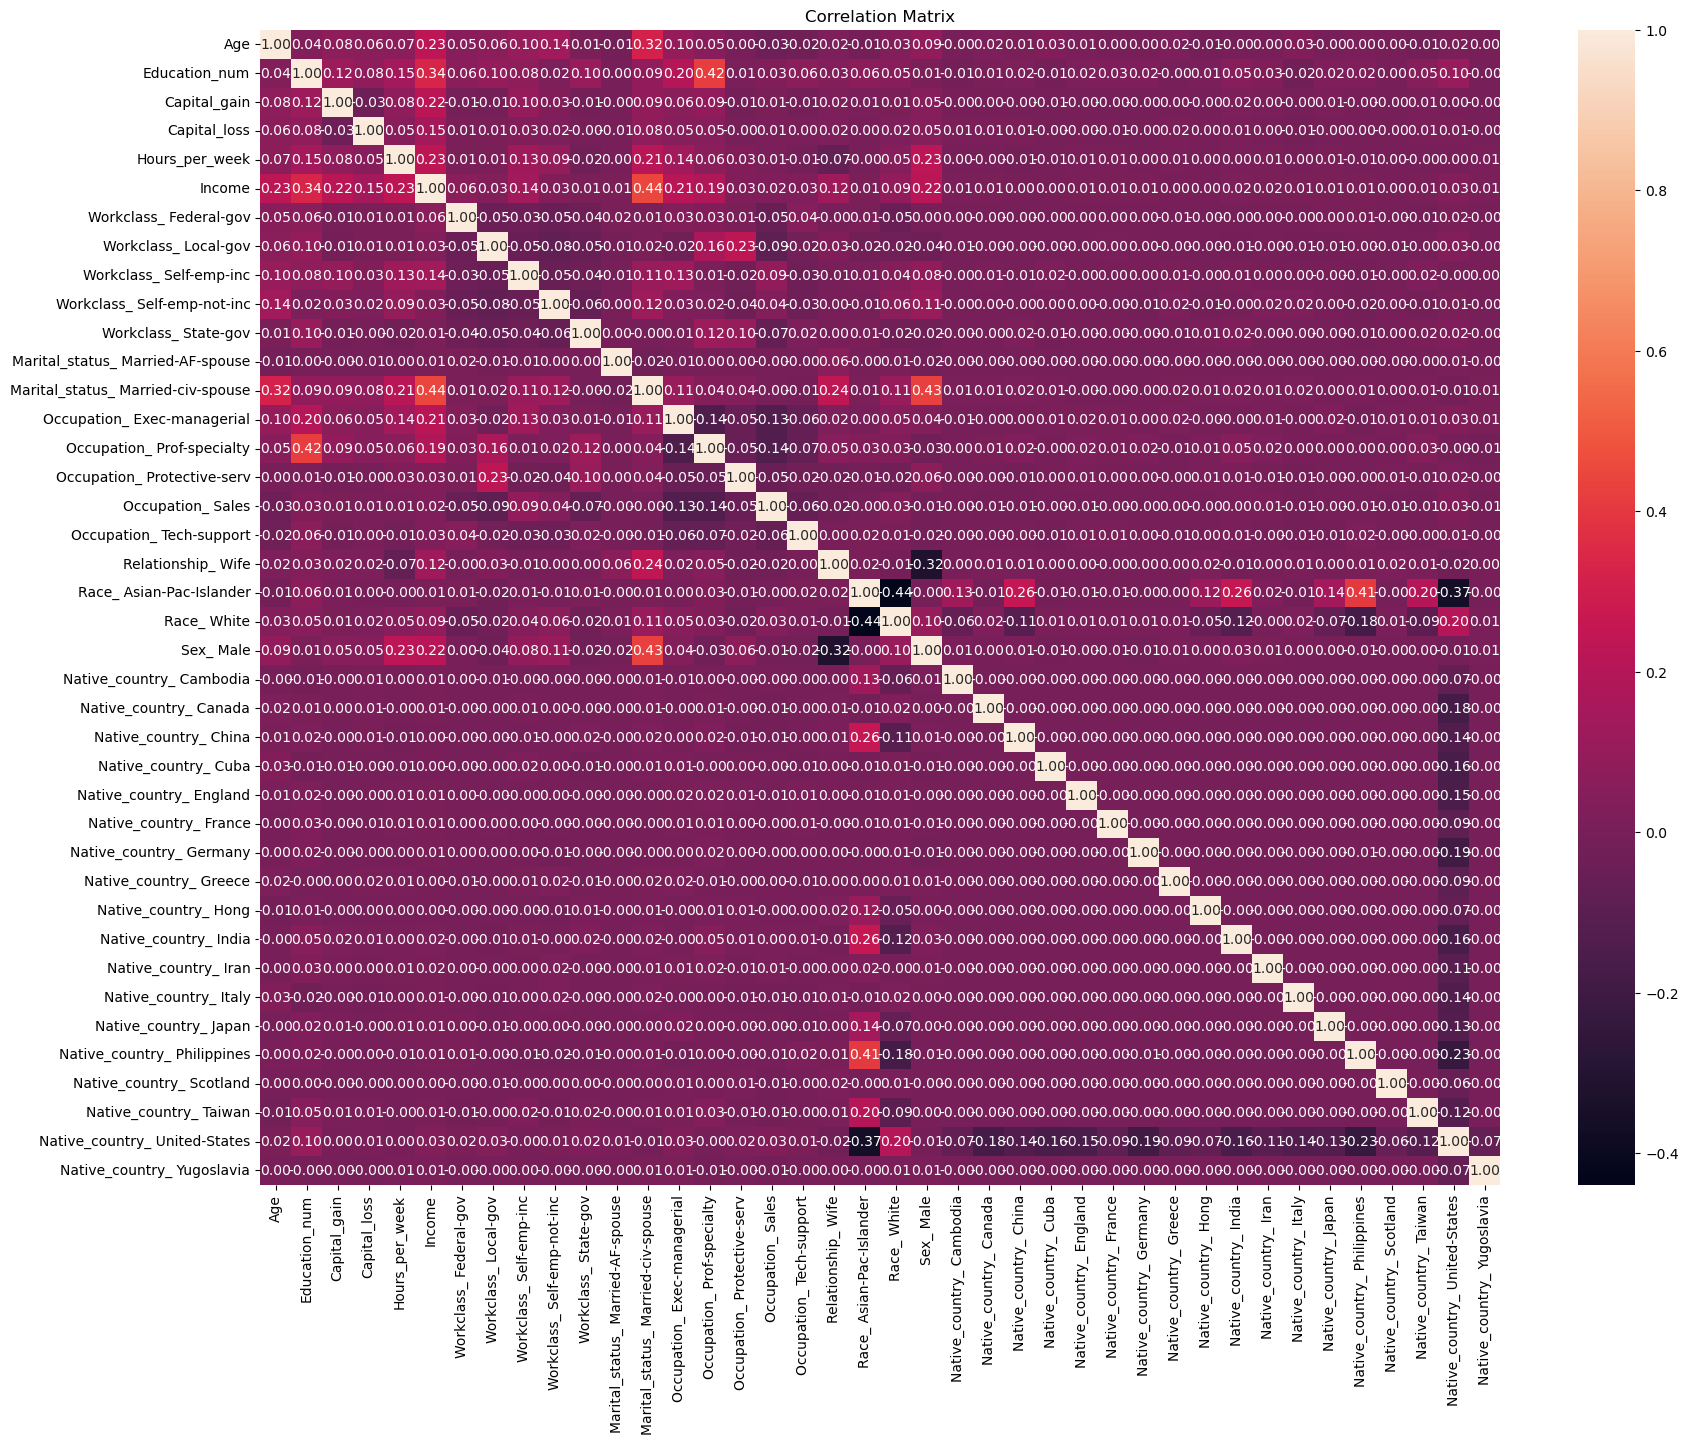

In [33]:
# Correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(data_positive_corr.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [35]:
X = data_positive_corr.drop(['Income'], axis=1)
y = data_positive_corr['Income']

In [36]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [37]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# Initialize regression models
lr = LinearRegression()
dtr = DecisionTreeRegressor(random_state=42)
rfr = RandomForestRegressor(random_state=42)

In [41]:
# List of models
models = {'Linear Regression': lr, 'Decision Tree Regressor': dtr, 'Random Forest Regressor': rfr}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    print(f'{name}:\nMSE: {mse:.2f}, R-squared: {r2:.2f}\n')

Linear Regression:
MSE: 0.12, R-squared: 0.36

Decision Tree Regressor:
MSE: 0.17, R-squared: 0.07

Random Forest Regressor:
MSE: 0.11, R-squared: 0.40



In [52]:
#Hyperparameter tuning on RandomForest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}

grid_search = GridSearchCV(rfr, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_reg, y_train_reg)

# Best parameters and model performance
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_best = best_model.predict(X_test_reg)
mse_best = mean_squared_error(y_test_reg, y_pred_best)
r2_best = r2_score(y_test_reg, y_pred_best)

print(f'Best model MSE: {mse_best}')
print(f'Best model R2 Score: {r2_best}')

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best model MSE: 0.09495759366135796
Best model R2 Score: 0.48763418786937185


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [46]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [47]:
# Initialize classification models
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

In [48]:
# List of classification models
classification_models = {'Logistic Regression': lr_clf, 'Decision Tree Classifier': dt_clf, 'Random Forest Classifier': rf_clf}

# Train and evaluate classification models
for name, model in classification_models.items():
    model.fit(X_train_clf, y_train_clf)
    y_pred_clf = model.predict(X_test_clf)
    accuracy = accuracy_score(y_test_clf, y_pred_clf)
    print(f'{name}:\nAccuracy: {accuracy:.2f}')
    print(f'Classification Report:\n{classification_report(y_test_clf, y_pred_clf)}\n')

Logistic Regression:
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4912
           1       0.73      0.60      0.66      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.77      0.78      6512
weighted avg       0.84      0.85      0.84      6512


Decision Tree Classifier:
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4912
           1       0.64      0.61      0.62      1600

    accuracy                           0.82      6512
   macro avg       0.76      0.75      0.75      6512
weighted avg       0.82      0.82      0.82      6512


Random Forest Classifier:
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4912
           1       0.72      0.64      0.68     

In [51]:
#Hyperparameter tuning on RandomForest Classifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}

grid_search = GridSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_clf, y_train_clf)

# Best parameters and model performance
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_best = best_model.predict(X_test_clf)
acc_best = accuracy_score(y_test_clf, y_pred_best)

print(f'Best model Accuracy: {acc_best}')

Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Best model Accuracy: 0.8651719901719902


# Census Income Prediction Project

## Overview
This project aims to predict whether an individual earns more than $50,000 annually based on various demographic and socio-economic features extracted from the 1994 Census Bureau database.

## Steps Involved:

### 1. Data Preprocessing
- **Loading the Data**: The dataset was loaded from a CSV file.
- **Data Exploration**: 
  - Displayed the first few rows and basic information about the dataset.
  - Checked for missing values and their distribution.
  
### 2. Exploratory Data Analysis (EDA)
- **Income Distribution**: Visualized the income distribution using a count plot to understand the class imbalance.
  
### 3. Data Cleaning
- **Feature Reduction**: Dropped the 'Education' column since it was redundant (the 'Education_num' column contains the same information).
- **Encoding Categorical Variables**: 
  - Used one-hot encoding for categorical features: `Workclass`, `Marital_status`, `Occupation`, `Relationship`, `Race`, `Sex`, and `Native_country`.
  - Label encoded the target variable `Income` to convert it into a binary format.

### 4. Correlation Analysis
- **Correlation Matrix**: Generated a heatmap to visualize the correlation between features and the target variable `Income`.
- **Positive Correlation**: Identified features positively correlated with income, creating a filtered dataset containing only these features.

### 5. Model Building
- **Feature Selection**: Selected features based on positive correlation with income.
- **Data Splitting**: Split the dataset into training and testing sets (80/20 split).
- **Scaling Features**: Applied StandardScaler to standardize feature values.

### 6. Model Evaluation
- **Regression Models**: Evaluated different regression models (Linear Regression, Decision Tree Regressor, Random Forest Regressor) on predicting income.
  - Calculated metrics: Mean Squared Error (MSE) and R-squared (R²).

### 7. Hyperparameter Tuning for Regression
- **Grid Search**: Performed hyperparameter tuning for the Random Forest Regressor to optimize performance using `GridSearchCV`.

### 8. Classification Model Building
- **Classification Models**: Trained different classifiers (Logistic Regression, Decision Tree Classifier, Random Forest Classifier) on the same dataset to predict income.
- **Evaluation Metrics**: Used accuracy and classification reports to evaluate the model performance.

### 9. Hyperparameter Tuning for Classification
- **Grid Search**: Performed hyperparameter tuning for the Random Forest Classifier using `GridSearchCV`.

## Results
- Presented the best model performance for both regression and classification tasks, including MSE and accuracy scores after tuning.